# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Gibran Faktian Anwar
- Email: gfaktian22@gmail.com
- Id Dicoding: gibran_faktian

## Persiapan

### Menyiapkan library yang dibutuhkan

In [107]:
# Importing library yang dibutuhkan

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import joblib

## Data Understanding

- EmployeeId - Employee Identifier
- Attrition - Did the employee attrition? (0=no, 1=yes)
- Age - Age of the employee
- BusinessTravel - Travel commitments for the job
- DailyRate - Daily salary
- Department - Employee Department
- DistanceFromHome - Distance from work to home (in km)
- Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
- EducationField - Field of Education
- EmployeeCount
- EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- Gender - Employee's gender
- HourlyRate - Hourly salary
- JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
- JobLevel - Level of job (1 to 5)
- JobRole - Job Roles
- JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- MaritalStatus - Marital Status
- MonthlyIncome - Monthly salary
- MonthlyRate - Mounthly rate
- NumCompaniesWorked - Number of companies worked at
- Over18 - Over 18 years of age?
- OverTime - Overtime?
- PercentSalaryHike - The percentage increase in salary last year
- PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
- StandardHours - Standard Hours
- StockOptionLevel - Stock Option Level
- TotalWorkingYears - Total years worked
- TrainingTimesLastYear - Number of training attended last year
- WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- YearsAtCompany - Years at Company
- YearsInCurrentRole - Years in the current role
- YearsSinceLastPromotion - Years since the last promotion
- YearsWithCurrManager - Years with the current manager

In [8]:
# read dataset
data = pd.read_csv('employee_data.csv')

In [9]:
# menampilkan ringkasan statistik
data.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### Pencarian missing value

In [114]:
# membuat list kolom yang hilang
missing_columns = data.columns[data.isnull().any()].tolist()

In [115]:
# menampilkam kolom yang hilang
missing_values = data[missing_columns].isnull().sum()
print(missing_values)

Attrition    412
dtype: int64


In [ ]:
# menghilangkan kolom yang kosong
df = data.dropna()

In [ ]:
# menampilkan nilai unik dari tiap fiturnya dari yang tertinggi
df.nunique().sort_values(ascending=False)


EmployeeId                  1058
MonthlyRate                 1038
MonthlyIncome                991
DailyRate                    731
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                35
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
BusinessTravel                 3
Department                     3
MaritalStatus                  3
PerformanceRating              2
OverTime                       2
Attrition 

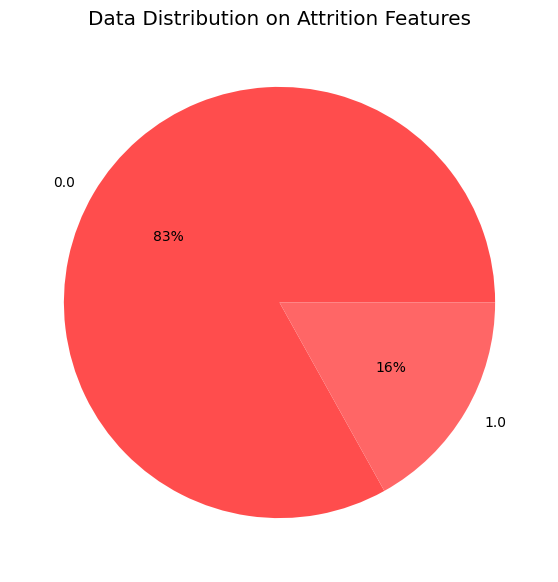

In [96]:
# membuat pie chart sebaran data dari data Attrition
distribution_data = df['Attrition'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(distribution_data, labels=distribution_data.index, autopct='%d%%', colors=['#ff4d4d', '#ff6666'])
plt.title('Data Distribution on Attrition Features')
plt.show()

In [ ]:
# membuat matix korelasi
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

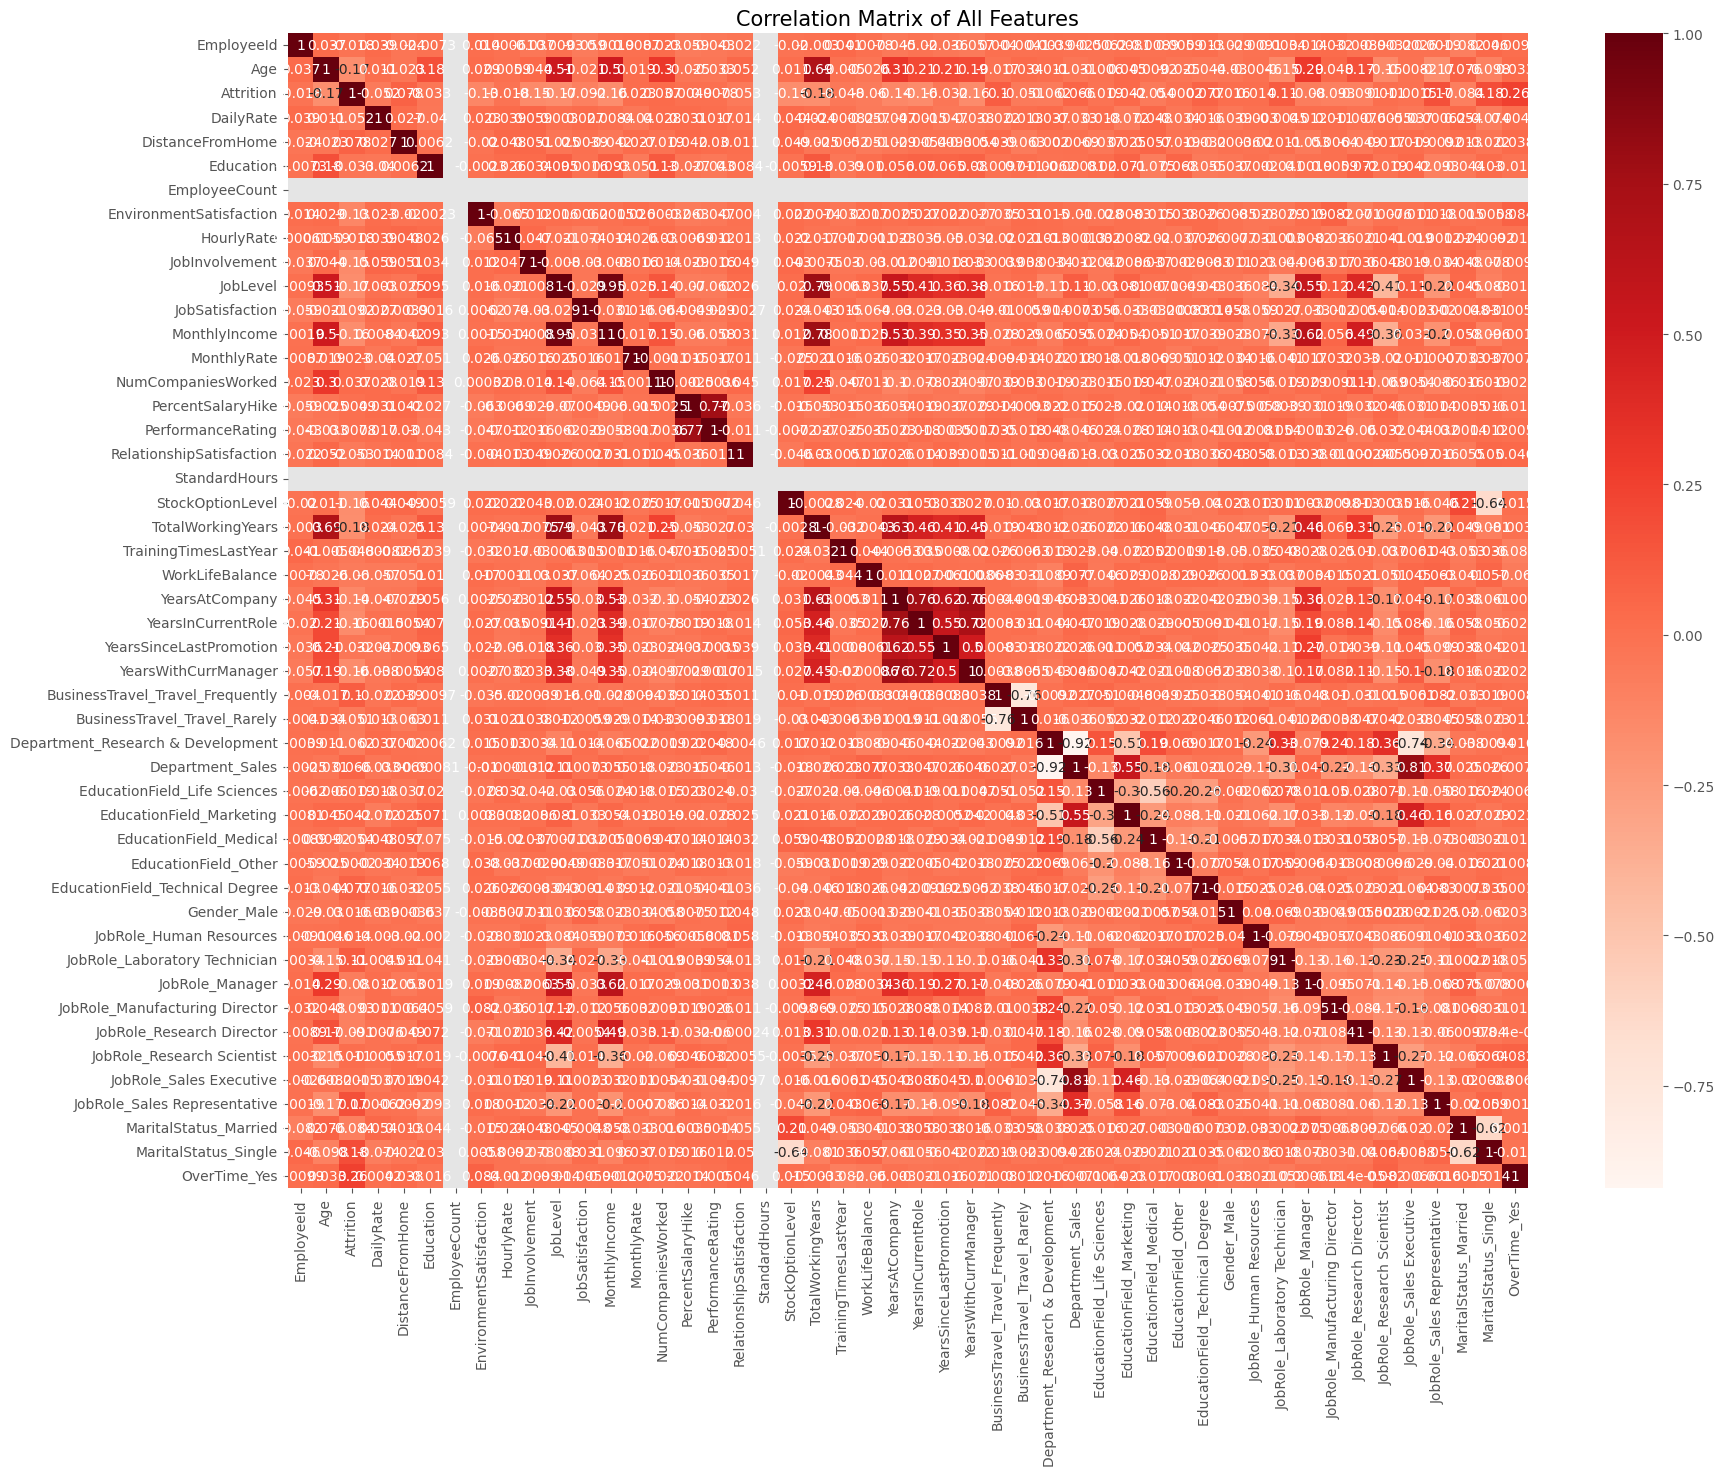

In [80]:
# menampilkam heatmapnya
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix of All Features', size=15)
plt.show()

Top 10 factors most correlated with Attrition:
OverTime_Yes                        0.255856
MaritalStatus_Single                0.184303
JobRole_Sales Representative        0.168200
JobRole_Laboratory Technician       0.113390
BusinessTravel_Travel_Frequently    0.104074
DistanceFromHome                    0.078074
EducationField_Technical Degree     0.076868
Department_Sales                    0.066083
EducationField_Marketing            0.042300
NumCompaniesWorked                  0.037429
Name: Attrition, dtype: float64


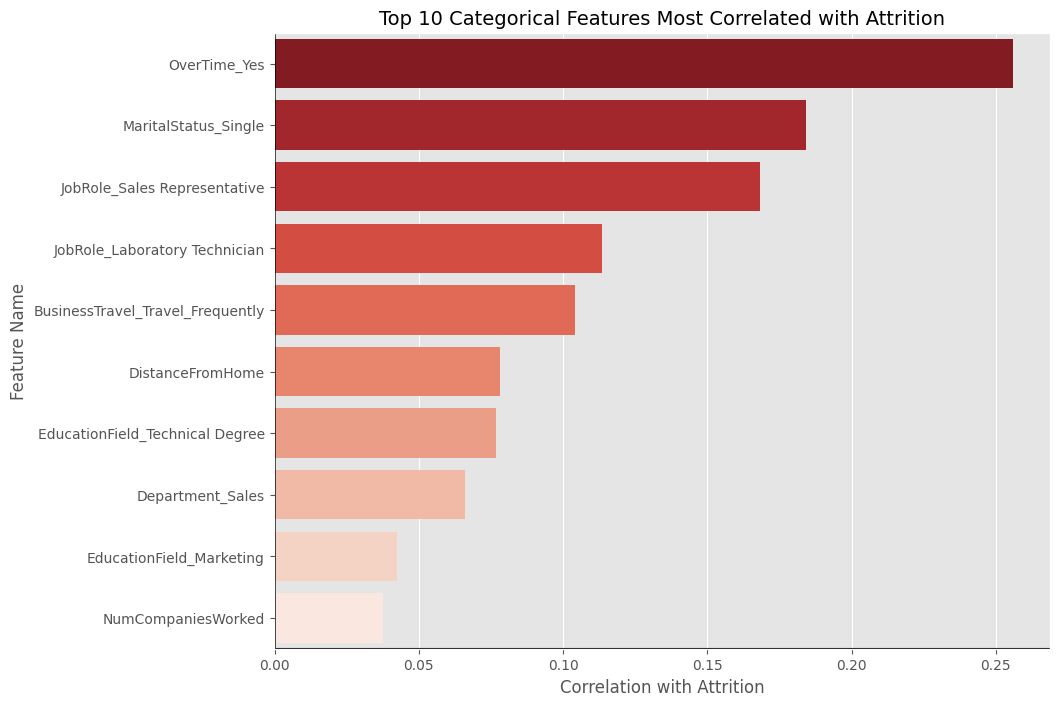

In [ ]:
# mengambil fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_new = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Membuat matrix korelasi
correlation_matrix = df_new.corr()

# mencari korelasi untuk attrition
attrition_corr = correlation_matrix["Attrition"].sort_values(ascending=False)

# mengambil 10 teratar fiture yang memiliki korelasi kuat dengan attrition
top_feature = attrition_corr.head(11)  
top_feature = top_feature.drop('Attrition')

# menampilkannya
print("Top 10 factors most correlated with Attrition:")
print(top_feature)

# menampilkan plotnya
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Reds_r", n_colors=10)  
sns.barplot(x=top_feature.values, y=top_feature.index, palette=colors, edgecolor=None)

# customisasi tampilan plot
plt.title("Top 10 Categorical Features Most Correlated with Attrition", fontsize=14)
plt.xlabel("Correlation with Attrition", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.axhline(y=9.5, xmin=0, xmax=1, color='black', linewidth=1.5)

plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['left'].set_color('black')
plt.show()


## Data Preparation / Preprocessing

In [100]:
clean_df = df.copy()
clean_df = clean_df.drop(['EmployeeId'], axis=1)

# Identifikasi fitur numerik dan kategorikal
cat_columns = clean_df.select_dtypes(include=['object']).columns.tolist()
num_columns = clean_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Attrition' in num_columns:
    num_columns.remove('Attrition')

# Standardisasi fitur numerik
scaler = StandardScaler()
clean_df[num_columns] = scaler.fit_transform(clean_df[num_columns])

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(clean_df, columns=cat_columns, drop_first=True)

#Mengubah nilai True dan False menjadi 1 dan 0
df_encoded = df_encoded.astype(int)

In [101]:
# memisahkan antara fitur dan label
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# memisahkan 20 test dan 80 train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [105]:
# membuat model SVM
model_svc = SVC(probability=True)
model_svc.fit(X_train, y_train)

SVC(probability=True)

## Evaluation

In [106]:
# Prediksi pada data uji
y_pred = model_svc.predict(X_test)
y_proba = model_svc.predict_proba(X_test)[:, 1]

# Evaluasi hasil
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.8349056603773585

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       173
           1       1.00      0.10      0.19        39

    accuracy                           0.83       212
   macro avg       0.92      0.55      0.55       212
weighted avg       0.86      0.83      0.78       212


AUC-ROC Score: 0.8174003260708463
Confusion Matrix:
 [[173   0]
 [ 35   4]]


In [108]:
# menyimpan model
joblib.dump(model_svc, 'model.pkl')

['model.pkl']

In [110]:
import pandas as pd

# Masukkan nama file CSV yang ingin dikonversi
csv_file = "employee_data2.csv"  # Ganti dengan nama file CSV Anda
excel_file = "data.xlsx"  # Nama file Excel yang dihasilkan

# Membaca file CSV
df = pd.read_csv(csv_file)

# Menyimpan data ke file Excel
df.to_excel(excel_file, index=False)  # index=False agar indeks tidak ikut disimpan

print(f"File berhasil dikonversi dari {csv_file} ke {excel_file}.")


File berhasil dikonversi dari employee_data2.csv ke data.xlsx.
